# Training Traffic Sign Classifier
### (Make sure you have run "Create Custom Dataset Directory.ipynb" to create required directory structure)

In [1]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
from torch.utils.data import Dataset
from torch.optim import lr_scheduler

from PIL import Image

In [2]:
class TrafficSignDataset(Dataset):

    def __init__(self, root, transform=None):
        self.data = [] #save path but not image, save memory
        self.label = []
        self.classes = ['000', '001', '002', '003', '004', '005', '006', '007', '008', '009',
            '010', '011', '012', '013', '014', '015', '016', '017', '018', '019',
            '020', '021', '022', '023', '024', '025', '026', '027', '028', '029',
            '030', '031', '032', '033', '034', '035', '036', '037', '038', '039',
            '040', '041', '042', '043', '044', '045', '046', '047', '048', '049',
            '050', '051', '052', '053', '054', '055', '056', '057']
        self.transform = transform

      #get the list of all files in the dataset (load file name)
        for l, c in enumerate(self.classes): #'000, 001...'
            cls_folder = os.path.join(root, c)
            for f in os.listdir(cls_folder):
                self.data.append(os.path.join(cls_folder, f))
                self.label.append(l)

    def __len__(self):
          return len(self.data)

    def __getitem__(self, idx):
        
        # get the image
        img_path = self.data[idx]
        image = Image.open(img_path) #PIL image

        # perform transformation
        if self.transform is not None:
            image = self.transform(image)
        
        # get the label
        label = self.label[idx]
        
        return image, label

In [3]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# transform the model
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [4]:
current_dir = os.getcwd()
path = os.path.join(current_dir, "traffic sign dataset\\train")
dataset = TrafficSignDataset(path, transform=transform) #call the init function

In [5]:
img, label = dataset[0] #call __getitem__(idx)

In [6]:
img

tensor([[[ 0.0196,  0.0196,  0.0118,  ..., -0.2941, -0.2314, -0.2000],
         [ 0.0196,  0.0196,  0.0118,  ..., -0.3020, -0.2392, -0.2078],
         [ 0.0196,  0.0196,  0.0118,  ..., -0.3098, -0.2392, -0.2000],
         ...,
         [-0.0902, -0.0902, -0.0980,  ..., -0.2549, -0.2627, -0.2706],
         [-0.0980, -0.0980, -0.1059,  ..., -0.2627, -0.2706, -0.2706],
         [-0.1059, -0.1059, -0.1137,  ..., -0.2706, -0.2706, -0.2706]],

        [[-0.1137, -0.1137, -0.1059,  ..., -0.3490, -0.2941, -0.2706],
         [-0.1137, -0.1137, -0.1059,  ..., -0.3569, -0.2941, -0.2706],
         [-0.1137, -0.1137, -0.1137,  ..., -0.3647, -0.3020, -0.2706],
         ...,
         [-0.2078, -0.2078, -0.2157,  ..., -0.3333, -0.3255, -0.3255],
         [-0.2157, -0.2157, -0.2157,  ..., -0.3412, -0.3333, -0.3333],
         [-0.2157, -0.2157, -0.2157,  ..., -0.3412, -0.3412, -0.3412]],

        [[-0.2235, -0.2235, -0.2314,  ..., -0.4431, -0.3882, -0.3647],
         [-0.2235, -0.2235, -0.2314,  ..., -0

In [7]:
len(dataset)

4170

In [8]:
dataset.data

['D:\\Computer Science\\y3s1\\UCCC2513 MINI PROJECT\\Traffic Sign Image Segmentation\\traffic sign dataset\\train\\000\\000_0001.png',
 'D:\\Computer Science\\y3s1\\UCCC2513 MINI PROJECT\\Traffic Sign Image Segmentation\\traffic sign dataset\\train\\000\\000_0002.png',
 'D:\\Computer Science\\y3s1\\UCCC2513 MINI PROJECT\\Traffic Sign Image Segmentation\\traffic sign dataset\\train\\000\\000_0003.png',
 'D:\\Computer Science\\y3s1\\UCCC2513 MINI PROJECT\\Traffic Sign Image Segmentation\\traffic sign dataset\\train\\000\\000_0004.png',
 'D:\\Computer Science\\y3s1\\UCCC2513 MINI PROJECT\\Traffic Sign Image Segmentation\\traffic sign dataset\\train\\000\\000_0005.png',
 'D:\\Computer Science\\y3s1\\UCCC2513 MINI PROJECT\\Traffic Sign Image Segmentation\\traffic sign dataset\\train\\000\\000_0006.png',
 'D:\\Computer Science\\y3s1\\UCCC2513 MINI PROJECT\\Traffic Sign Image Segmentation\\traffic sign dataset\\train\\000\\000_0007.png',
 'D:\\Computer Science\\y3s1\\UCCC2513 MINI PROJECT\\Tr

In [9]:
dataset.label[75:80]

[0, 0, 0, 0, 0]

In [10]:
dataset.data[:5]

['D:\\Computer Science\\y3s1\\UCCC2513 MINI PROJECT\\Traffic Sign Image Segmentation\\traffic sign dataset\\train\\000\\000_0001.png',
 'D:\\Computer Science\\y3s1\\UCCC2513 MINI PROJECT\\Traffic Sign Image Segmentation\\traffic sign dataset\\train\\000\\000_0002.png',
 'D:\\Computer Science\\y3s1\\UCCC2513 MINI PROJECT\\Traffic Sign Image Segmentation\\traffic sign dataset\\train\\000\\000_0003.png',
 'D:\\Computer Science\\y3s1\\UCCC2513 MINI PROJECT\\Traffic Sign Image Segmentation\\traffic sign dataset\\train\\000\\000_0004.png',
 'D:\\Computer Science\\y3s1\\UCCC2513 MINI PROJECT\\Traffic Sign Image Segmentation\\traffic sign dataset\\train\\000\\000_0005.png']

In [11]:
len(dataset) #call __len__

4170

In [12]:
trainset = TrafficSignDataset('./traffic sign dataset/train', transform=None)

print('Number of samples in dataset:', len(trainset))
print('Number of classes:', trainset.classes)

Number of samples in dataset: 4170
Number of classes: ['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057']


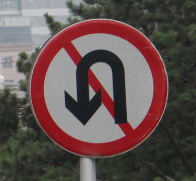

Class = 015


In [13]:
image, label = trainset[1500]
display(image)
print("Class =", trainset.classes[label])

# Transformation and Data Loader

In [14]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# transform the model
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [15]:
trainset = TrafficSignDataset("./traffic sign dataset/train", transform=train_transform)
trainloader = DataLoader(trainset, batch_size=4, shuffle=True, num_workers=0)

In [16]:
def customize_network(weights = 'IMAGENET1K_V1'):

    # replace the classification layer
    efficientNet = models.efficientnet_b0(weights=weights)
    in_c = efficientNet.classifier[1].in_features  
    efficientNet.classifier[1] = nn.Sequential(
        nn.Linear(in_c, 58), #out_channel = 58
        nn.Softmax()  #for multiclass classification, use the softmax activation
    )
    # freeze the top layers
    freeze_layers = ["features.6", "features.7", "features.8", "classifier"] 

    for name, param in efficientNet.named_parameters():
        if np.any([name.startswith(layer) for layer in freeze_layers]):
            param.requires_grad = True
        else:
            param.requires_grad = False    
    
    return efficientNet

In [17]:
efficientNet = customize_network(weights = 'IMAGENET1K_V1') #loading customized model

In [18]:
for name, layer in efficientNet.named_children():
    print(name)

features
avgpool
classifier


In [19]:
print(efficientNet.classifier) #check output layer

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Sequential(
    (0): Linear(in_features=1280, out_features=58, bias=True)
    (1): Softmax(dim=None)
  )
)


In [21]:
for name, param in efficientNet.named_parameters(): #check freezed layers
    print(name, "==>", param.requires_grad)

features.0.0.weight ==> False
features.0.1.weight ==> False
features.0.1.bias ==> False
features.1.0.block.0.0.weight ==> False
features.1.0.block.0.1.weight ==> False
features.1.0.block.0.1.bias ==> False
features.1.0.block.1.fc1.weight ==> False
features.1.0.block.1.fc1.bias ==> False
features.1.0.block.1.fc2.weight ==> False
features.1.0.block.1.fc2.bias ==> False
features.1.0.block.2.0.weight ==> False
features.1.0.block.2.1.weight ==> False
features.1.0.block.2.1.bias ==> False
features.2.0.block.0.0.weight ==> False
features.2.0.block.0.1.weight ==> False
features.2.0.block.0.1.bias ==> False
features.2.0.block.1.0.weight ==> False
features.2.0.block.1.1.weight ==> False
features.2.0.block.1.1.bias ==> False
features.2.0.block.2.fc1.weight ==> False
features.2.0.block.2.fc1.bias ==> False
features.2.0.block.2.fc2.weight ==> False
features.2.0.block.2.fc2.bias ==> False
features.2.0.block.3.0.weight ==> False
features.2.0.block.3.1.weight ==> False
features.2.0.block.3.1.bias ==> 

# Training

In [22]:
optimizer = optim.SGD(efficientNet.parameters(), lr=0.01, momentum=0.9) #set initial lr = 0.01

In [23]:
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1) #optimizer = starting lr, step_size=when want to reduce, gamma = how much want to scale

In [24]:
for i, (inputs, labels) in enumerate(trainloader):

    if torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
        efficientNet = efficientNet.cuda()
    print(labels)
    outs = efficientNet(inputs)
    print(outs)

    max = nn.LogSoftmax()
    s = max(outs)
    print(s)

    softmax = nn.Softmax()
    log = torch.log(softmax(outs))
    nll = F.nll_loss(log, labels)
    print(nll)

    loss = F.cross_entropy(outs, labels)
    print(loss)
    break

tensor([ 3, 54,  7,  3], device='cuda:0')
tensor([[0.0151, 0.0189, 0.0163, 0.0196, 0.0171, 0.0119, 0.0116, 0.0157, 0.0163,
         0.0227, 0.0215, 0.0197, 0.0175, 0.0169, 0.0171, 0.0171, 0.0121, 0.0150,
         0.0174, 0.0194, 0.0199, 0.0180, 0.0191, 0.0203, 0.0219, 0.0202, 0.0209,
         0.0158, 0.0139, 0.0150, 0.0166, 0.0168, 0.0152, 0.0154, 0.0149, 0.0140,
         0.0177, 0.0171, 0.0141, 0.0188, 0.0145, 0.0173, 0.0195, 0.0166, 0.0182,
         0.0182, 0.0155, 0.0149, 0.0254, 0.0155, 0.0154, 0.0206, 0.0142, 0.0139,
         0.0162, 0.0158, 0.0198, 0.0237],
        [0.0156, 0.0123, 0.0229, 0.0154, 0.0126, 0.0231, 0.0121, 0.0160, 0.0159,
         0.0208, 0.0244, 0.0186, 0.0184, 0.0143, 0.0160, 0.0182, 0.0143, 0.0183,
         0.0165, 0.0146, 0.0198, 0.0162, 0.0158, 0.0129, 0.0206, 0.0129, 0.0213,
         0.0194, 0.0186, 0.0138, 0.0168, 0.0139, 0.0173, 0.0203, 0.0201, 0.0154,
         0.0162, 0.0191, 0.0180, 0.0169, 0.0149, 0.0188, 0.0152, 0.0153, 0.0203,
         0.0187, 0.0205, 

C:\Users\Gan Kian Yu\AppData\Local\Temp\ipykernel_15784\538419849.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  s = max(outs)
C:\Users\Gan Kian Yu\AppData\Local\Temp\ipykernel_15784\538419849.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  log = torch.log(softmax(outs))


In [25]:
def train(net, trainloader, optimizer, scheduler, num_epochs):
    
    history = []
    
    # transfer model to GPU
    if torch.cuda.is_available():
        net = net.cuda()
    
    # set to training mode
    net.train()

    # train the network
    for e in range(num_epochs):    # epoch iteration

        running_loss = 0.0
        running_count = 0.0

        for i, (inputs, labels) in enumerate(trainloader):  #batch iteration 

            #labels = labels.reshape(-1, 1).float()
            
            # Clear all the gradient to 0
            optimizer.zero_grad()

            # transfer data to GPU
            if torch.cuda.is_available():
                inputs = inputs.cuda()
                labels = labels.cuda()

            # forward propagation to get h"
            outs = net(inputs)
            # compute loss 
            loss = F.nll_loss(torch.log(outs), labels) #negative log likelihood loss
            # backpropagation to get dw
            loss.backward()

            # update the parameters
            optimizer.step()

            # get the loss
            running_loss += loss.item()
            running_count += 1

        # compute the averaged loss in each epoch
        train_loss = running_loss / running_count
        running_loss = 0. 
        running_count = 0.
        print(f'Epoch {e+1:2d}/{num_epochs:d} : train_loss = {train_loss:.4f}')       

        # Update the scheduler's counter at the end of each epoch
        scheduler.step() #step +1

    return 

In [31]:
train (efficientNet, trainloader, optimizer, scheduler, num_epochs=50)

Epoch  1/50 : train_loss = 0.7814
Epoch  2/50 : train_loss = 0.1526
Epoch  3/50 : train_loss = 0.0995
Epoch  4/50 : train_loss = 0.0548
Epoch  5/50 : train_loss = 0.0573
Epoch  6/50 : train_loss = 0.0356
Epoch  7/50 : train_loss = 0.0315
Epoch  8/50 : train_loss = 0.0209
Epoch  9/50 : train_loss = 0.0200
Epoch 10/50 : train_loss = 0.0193
Epoch 11/50 : train_loss = 0.0087
Epoch 12/50 : train_loss = 0.0084
Epoch 13/50 : train_loss = 0.0097
Epoch 14/50 : train_loss = 0.0080
Epoch 15/50 : train_loss = 0.0073
Epoch 16/50 : train_loss = 0.0049
Epoch 17/50 : train_loss = 0.0075
Epoch 18/50 : train_loss = 0.0057
Epoch 19/50 : train_loss = 0.0055
Epoch 20/50 : train_loss = 0.0051
Epoch 21/50 : train_loss = 0.0057
Epoch 22/50 : train_loss = 0.0046
Epoch 23/50 : train_loss = 0.0048
Epoch 24/50 : train_loss = 0.0051
Epoch 25/50 : train_loss = 0.0055
Epoch 26/50 : train_loss = 0.0066
Epoch 27/50 : train_loss = 0.0057
Epoch 28/50 : train_loss = 0.0062
Epoch 29/50 : train_loss = 0.0049
Epoch 30/50 : 

# Evaluate the model

In [38]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# transform the model
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

testset = TrafficSignDataset("./traffic sign dataset/val", transform=val_transform) #009, 018 019 033
testloader = DataLoader(testset, batch_size=4, shuffle=True, num_workers=0)

In [39]:
def evaluate(model, testloader):
    # set to evaluation mode
    model.eval()
    
    # running_correct
    running_corrects = 0
    running_count = 0

    for inputs, targets in testloader:
        
        # transfer to the GPU
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            targets = targets.cuda()
        
        # perform prediction (no need to compute gradient)
        with torch.no_grad():
            outputs = model(inputs)
            outputs = outputs.cpu()
            predicted = np.argmax(outputs, axis=1)
            predicted = predicted.cuda()
            running_corrects += (predicted == targets).sum().double()
            running_count += len(inputs)
            print('.', end='')

    print('\nAccuracy = {:.2f}%'.format(100*running_corrects/running_count))

In [40]:
evaluate(efficientNet, testloader)

..........................................................................................................................................................................

PermissionError: [Errno 13] Permission denied: './traffic sign dataset/val\\057\\009'

In [81]:
#torch.save(efficientNet, "saved_model.pt") #save model

In [110]:
new_model = torch.load("saved_model.pt") #load model

In [118]:
from PIL import Image
import cv2 as cv

img = Image.open('test image/028_1_0007.png')
#preprocess the image
transformed_img = val_transform(img) #shape:(3,224,224)

#add a batch dimention
transformed_img = transformed_img.unsqueeze(0) #shape:(1,3,224,224)

#device
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
transformed_img = transformed_img.to(device)
new_model = new_model.to(device)

new_model.eval()
#perform inference with the image
with torch.no_grad():
    yhat = new_model(transformed_img)

predicted = yhat.argmax().item()
print("yhat", yhat)
print("predicted = ", predicted)
print("sum =", torch.sum(yhat))

yhat tensor([[0.0164, 0.0157, 0.0144, 0.0126, 0.0181, 0.0244, 0.0197, 0.0125, 0.0129,
         0.0109, 0.0320, 0.0193, 0.0266, 0.0199, 0.0146, 0.0168, 0.0211, 0.0139,
         0.0194, 0.0175, 0.0190, 0.0196, 0.0159, 0.0159, 0.0196, 0.0228, 0.0201,
         0.0137, 0.0188, 0.0129, 0.0251, 0.0188, 0.0225, 0.0138, 0.0189, 0.0168,
         0.0095, 0.0156, 0.0148, 0.0149, 0.0126, 0.0118, 0.0211, 0.0144, 0.0143,
         0.0154, 0.0154, 0.0149, 0.0128, 0.0158, 0.0139, 0.0141, 0.0171, 0.0165,
         0.0230, 0.0189, 0.0220, 0.0185]], device='cuda:0')
predicted =  10
